In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [9]:
# Load the dataset
file_path = '../src/combined_solar_data.csv'

try:
    data = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
    print(data.head())  # Inspect the first few rows
except FileNotFoundError:
    print(f"File not found at: {file_path}. Please check the file path.")

Dataset loaded successfully!
          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments Country  
0       NaN   Benin  
1       NaN   Benin  
2       N

In [6]:
# Summary Statistics
summary_stats = data.describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
                GHI           DNI           DHI          ModA          ModB  \
count  1.576800e+06  1.576800e+06  1.576800e+06  1.576800e+06  1.576800e+06   
mean   2.243573e+02  1.449408e+02  1.151746e+02  2.231257e+02  2.155223e+02   
std    3.181073e+02  2.453781e+02  1.580602e+02  3.154732e+02  3.049439e+02   
min   -1.950000e+01 -7.800000e+00 -1.790000e+01  0.000000e+00  0.000000e+00   
25%   -2.200000e+00 -2.000000e-01 -1.400000e+00  0.000000e+00  0.000000e+00   
50%    1.200000e+00  0.000000e+00  1.400000e+00  4.100000e+00  4.000000e+00   
75%    4.244000e+02  2.270000e+02  2.190000e+02  4.111000e+02  3.973000e+02   
max    1.499000e+03  1.004500e+03  8.920000e+02  1.507000e+03  1.473000e+03   

               Tamb            RH            WS        WSgust       WSstdev  \
count  1.576800e+06  1.576800e+06  1.576800e+06  1.576800e+06  1.576800e+06   
mean   2.741696e+01  6.298333e+01  1.878440e+00  2.576763e+00  4.649840e-01   
std    5.131024e+00  2.854366e+

In [7]:
# Data Quality Check
missing_values = data.isnull().sum()
negative_values = (data.select_dtypes(include=[np.number]) < 0).sum()
print("\nMissing Values:")
print(missing_values)
print("\nNegative Values:")
print(negative_values)


Missing Values:
Timestamp              0
GHI                    0
DNI                    0
DHI                    0
ModA                   0
ModB                   0
Tamb                   0
RH                     0
WS                     0
WSgust                 0
WSstdev                0
WD                     0
WDstdev                0
BP                     0
Cleaning               0
Precipitation          0
TModA                  0
TModB                  0
Comments         1576800
Country                0
dtype: int64

Negative Values:
GHI              777367
DNI              542339
DHI              522310
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments              0
dtype: int64


In [12]:
# Fill missing values for numeric columns only
numeric_cols = data.select_dtypes(include=[np.number]).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())
print("Missing values filled for numeric columns.")

Missing values filled for numeric columns.


In [9]:
# Detecting outliers using Z-score
z_scores = zscore(data.select_dtypes(include=[np.number]))
outliers = np.where(np.abs(z_scores) > 3)
print("\nNumber of outliers:", len(outliers[0]))


Number of outliers: 75508


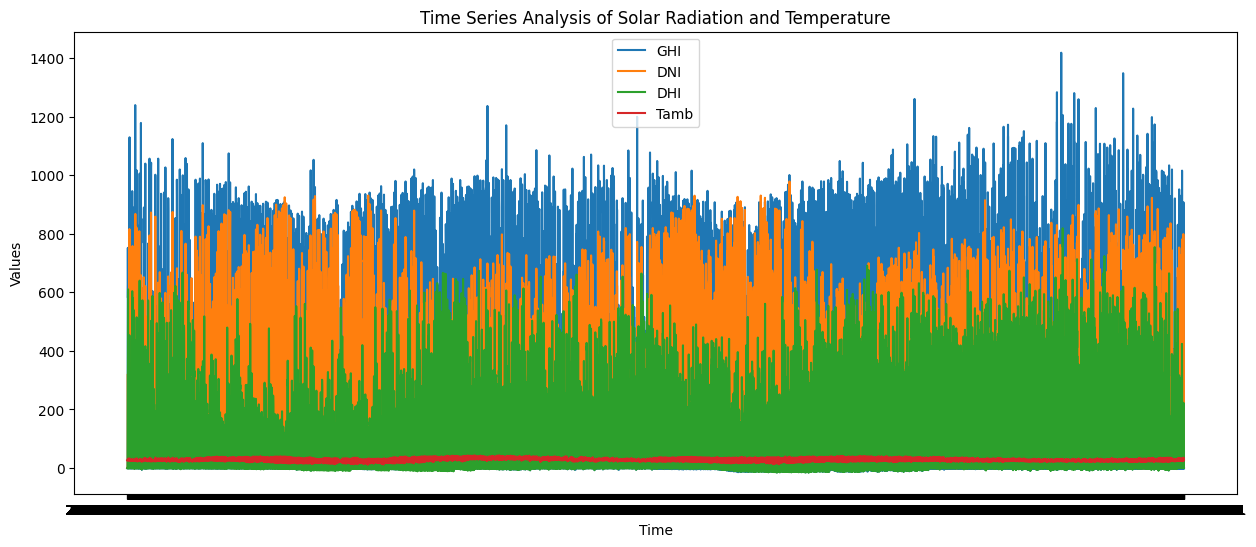

In [10]:
# Time Series Analysis
# Time Series Analysis - Downsample if necessary for better performance
downsampled_data = data.iloc[::100, :]  # Plot every 100th data point

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(downsampled_data['Timestamp'], downsampled_data['GHI'], label='GHI')
plt.plot(downsampled_data['Timestamp'], downsampled_data['DNI'], label='DNI')
plt.plot(downsampled_data['Timestamp'], downsampled_data['DHI'], label='DHI')
plt.plot(downsampled_data['Timestamp'], downsampled_data['Tamb'], label='Tamb')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Time Series Analysis of Solar Radiation and Temperature')
plt.legend()
plt.show()

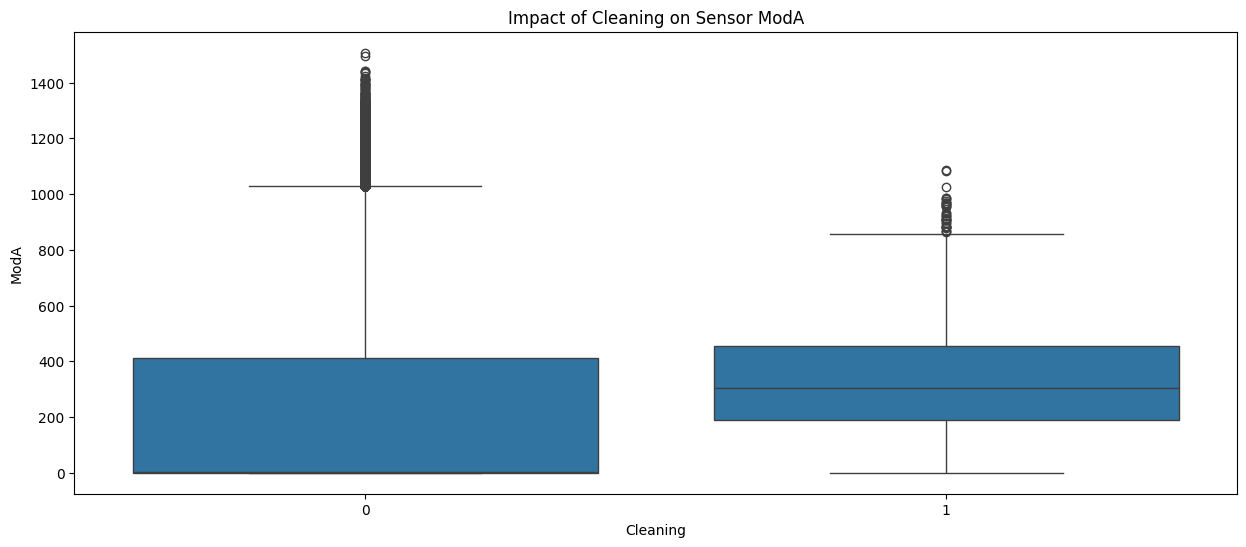

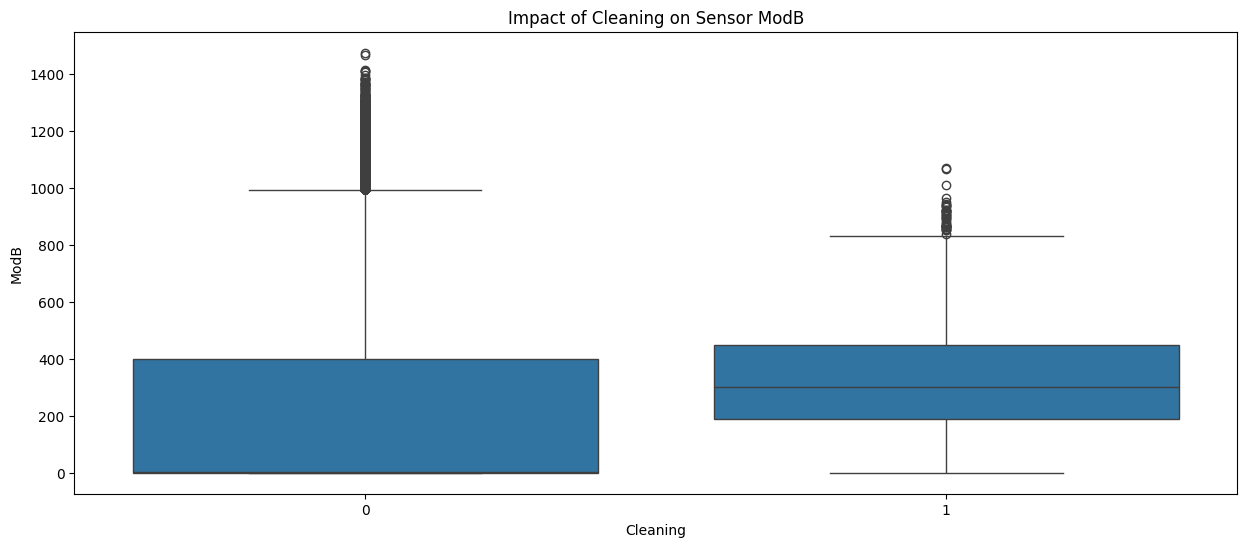

In [14]:
# Impact of Cleaning on Sensor Readings
plt.figure(figsize=(15, 6))
sns.boxplot(x=data['Cleaning'], y=data['ModA'])
plt.title('Impact of Cleaning on Sensor ModA')
plt.show()

plt.figure(figsize=(15, 6))
sns.boxplot(x=data['Cleaning'], y=data['ModB'])
plt.title('Impact of Cleaning on Sensor ModB')
plt.show()



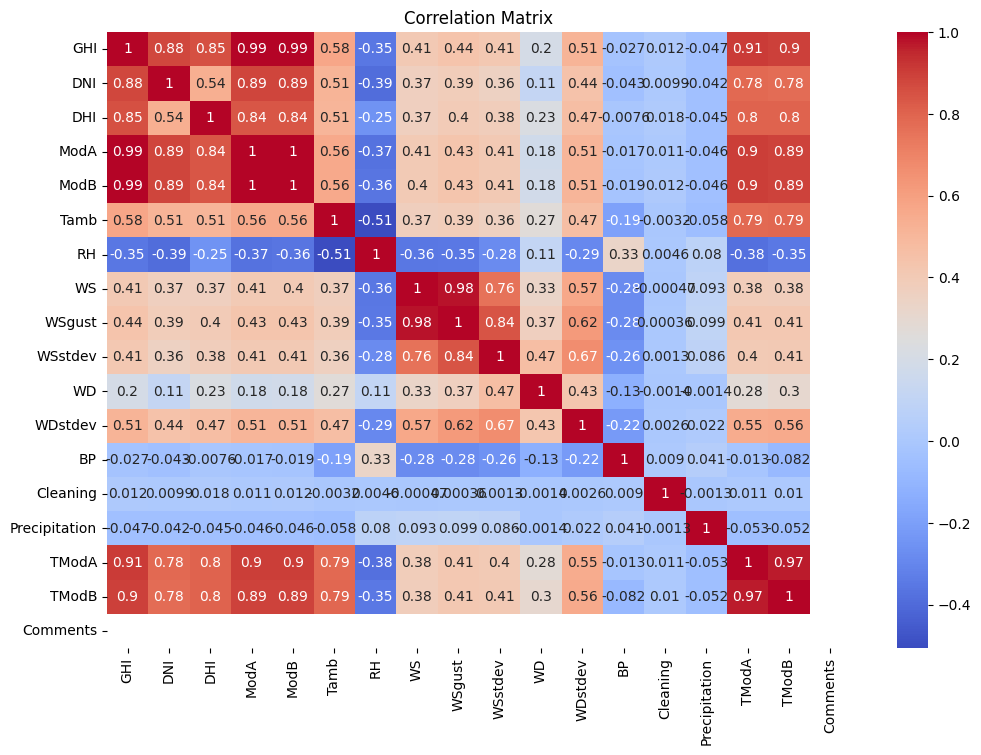

In [16]:
# Correlation Analysis
# Ensure only numeric columns are included for correlation calculation
numeric_data = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


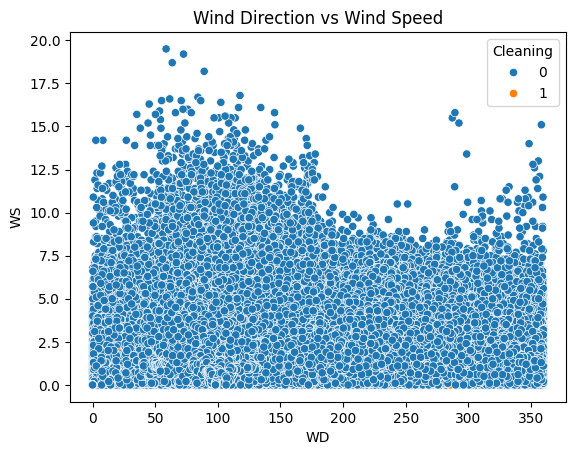

In [17]:
# Wind Analysis
sns.scatterplot(x=data['WD'], y=data['WS'], hue=data['Cleaning'])
plt.title('Wind Direction vs Wind Speed')
plt.show()

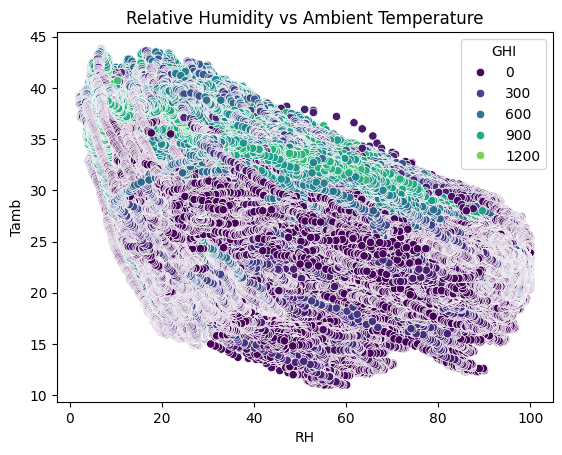

In [18]:
# Temperature Analysis
sns.scatterplot(x=data['RH'], y=data['Tamb'], hue=data['GHI'], palette='viridis')
plt.title('Relative Humidity vs Ambient Temperature')
plt.show()

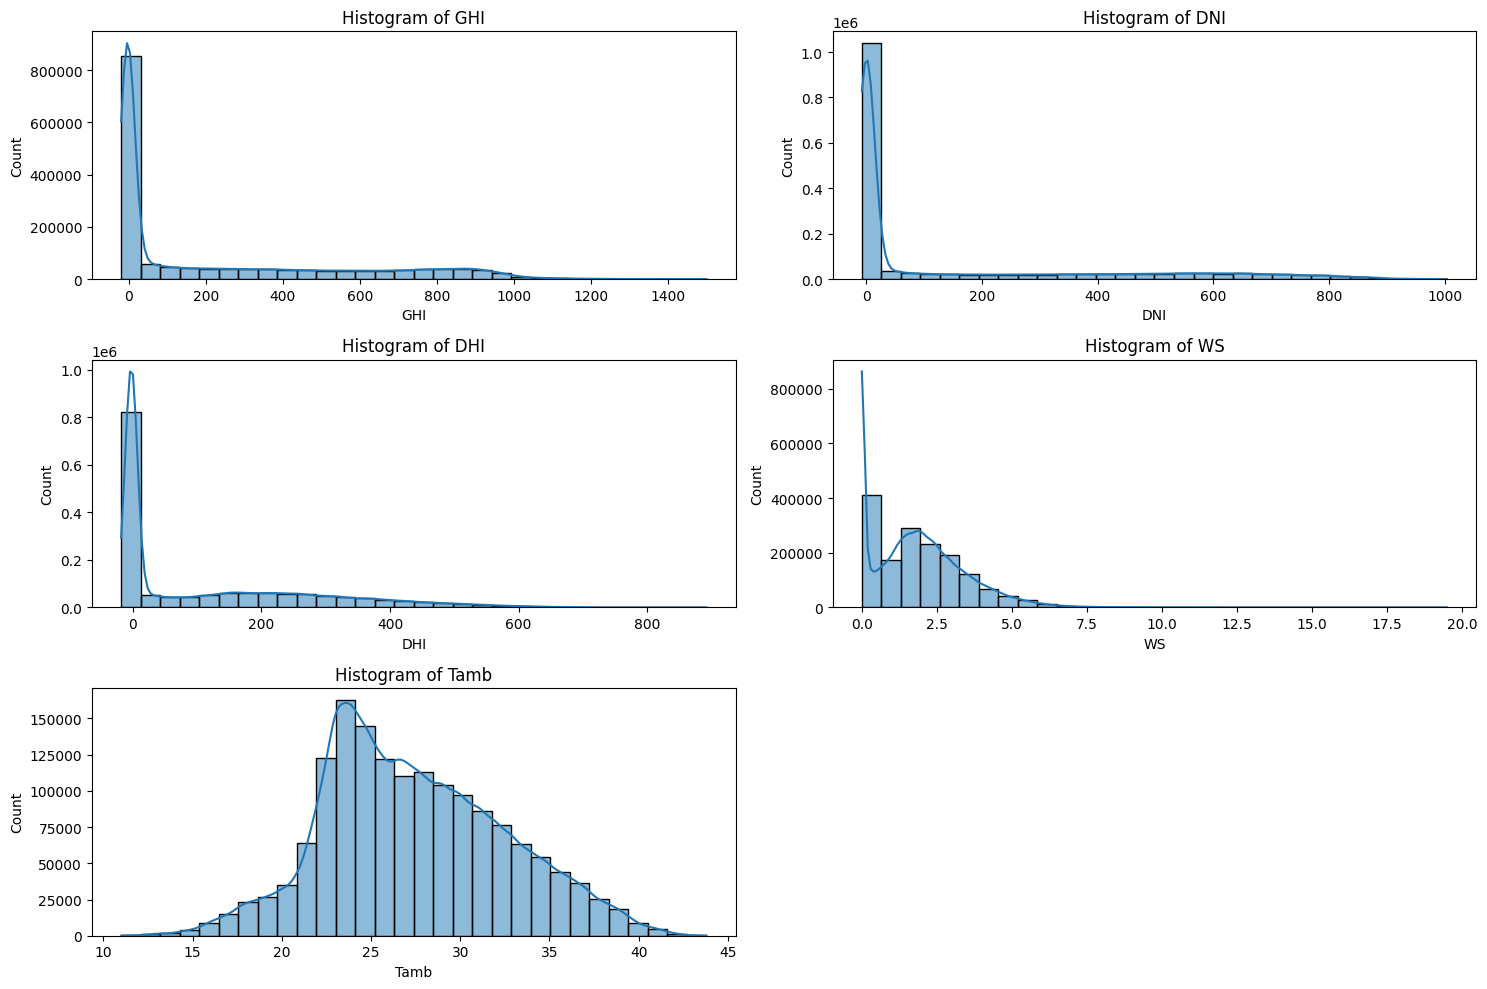

In [19]:
# Histograms
columns_to_plot = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb']
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

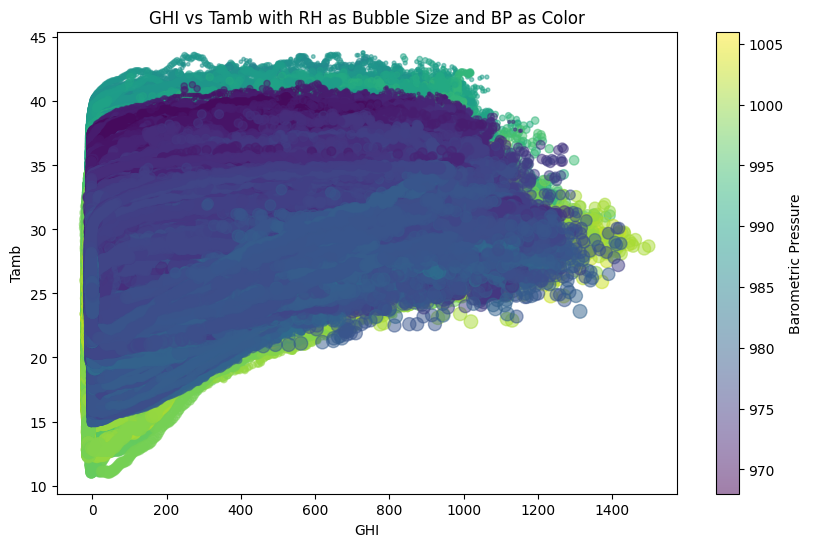

In [20]:
# Bubble Chart
plt.figure(figsize=(10, 6))
bubble = plt.scatter(
    data['GHI'], data['Tamb'], s=data['RH'], c=data['BP'], alpha=0.5, cmap='viridis')
plt.colorbar(bubble, label='Barometric Pressure')
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.title('GHI vs Tamb with RH as Bubble Size and BP as Color')
plt.show()

In [21]:
# Clean up Comments column if entirely null
data.drop(columns=['Comments'], inplace=True, errors='ignore')

# Save cleaned data
data.to_csv('cleaned_solar_data.csv', index=False)
